# Изучение закономерностей, определяющих успешность игр <a id='intro'></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель** - узнать, какие закономерности влияют на успешность игры, чтобы в дальнейшем выбрать, какую игру продвигать.

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В **ходе проекта** мы:
- изучим и обработаем данные, 
- проведем исследовательский анализ данных, 
- составим портрет пользователя каждого региона,
- проверим гипотезы
- сделаем общий вывод

**Оглавление**
- [Введение](#intro)
- [Подготовка данных](#preparing)
- [Анализ данных](#analysis)
- [Портреты пользователей](#portrait)
- [Проверка гипотез](#hypotheses)
- [Выводы](#results)

## 1. Откроем таблицу и изучим общую информацию о данных

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

import missingno as msno

In [3]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы**

В каждой строке таблицы - данные о игре. Часть колонок описывает саму игру: название, платформу, год выпуска, жанр и возрастной рейтинг. Остальные данные рассказывают о продажах игр, оценках пользователей и экспертов.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем. Также, некоторые стобцы имеют неправильные типы данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2. Подготовка данных <a id='preparing'></a>

### 2.1. Заменим названия столбцов

В названиях колонок строчные буквы сочетаются с прописными. Приведем названия столбцов к нижнему регистру.

In [6]:
data.columns = data.columns.str.lower()

Проверим результат

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Обработаем пропуски 

Выведем количество пропущенных значений для каждого столбца.

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19, 6), rot = -5, legend = False, fontsize = 16)
            .set_title('Количество пропусков в %' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

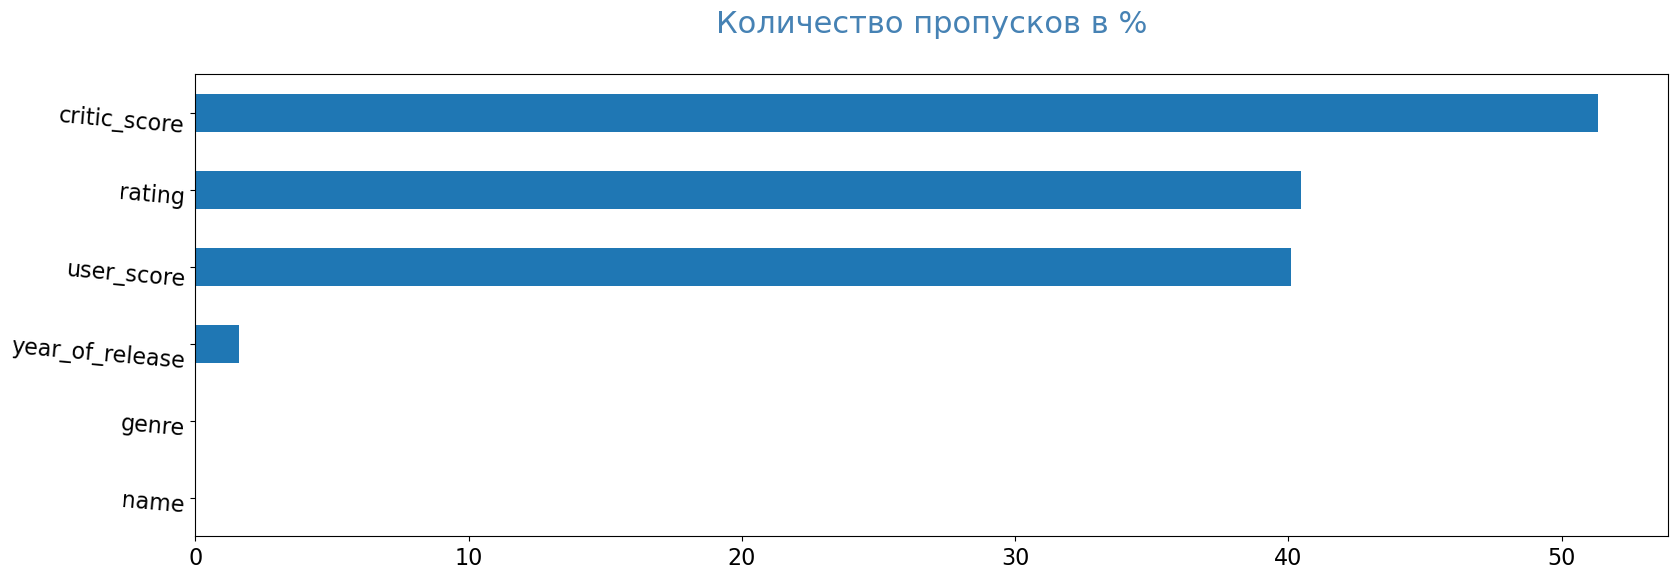

In [10]:
pass_value_barh(data)

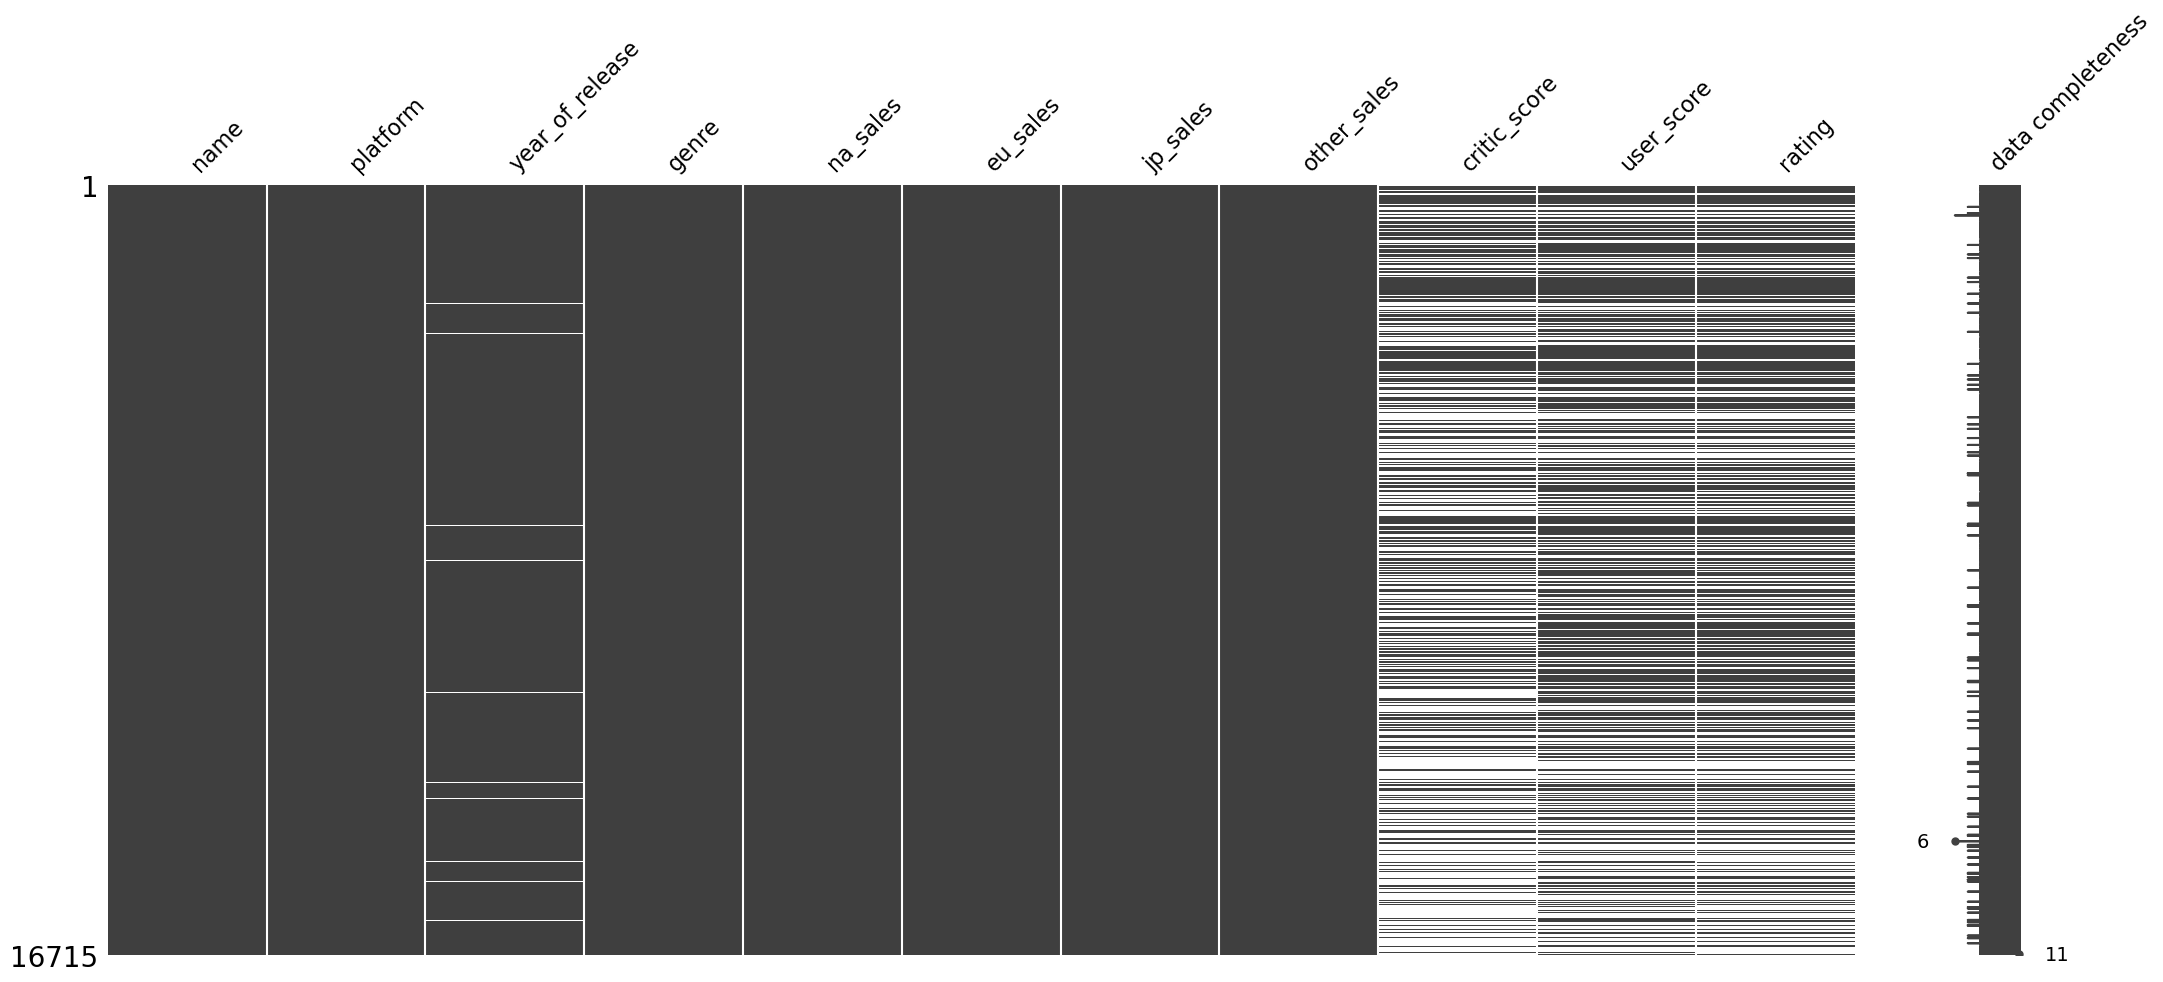

In [11]:
msno.matrix(data, labels=True);

Можем заметить 2 пропуска в столбце с названиями и жанрами. Заменим их на значения `unknown`.

In [12]:
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Данные пропуски занимают всего 1,6% от общих данных, заменять медианным значением их не совсем логично, а если оставим как есть, это помешает впоследствии исправить тип данных на целочисленный. Поэтому удалим их.

In [14]:
data = data.dropna(subset=['year_of_release'])

Теперь посмотрим не пропуски в столбце `user_score`.

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Можем увидеть аббревиатуру 'tbd'. Она означает, что рейтинг еще не  отпределен. Заменим эти показатели на пропуски.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', float('NaN'))

Что касается пропусков в столбце `rating`, то будем логично предположить, что пропуски означают, что игра не имеет данного рейтинга. Поэтому, вместо данных значений поставим `RP`, что значит, что игре еще не присвоен окончательный рейтинг ESRB.

In [17]:
data['rating'] = data['rating'].fillna('RP')

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating                0
dtype: int64

В итоге, пропуски остались только в столбцах `critic_score` и `user_score`, которые мы не будем ничем заменять, так как замена на среднее или медианное значение исказит данные, их лучше оставить в таком виде. 

### 2.3. Преобразуем данные в нужные типы

In [19]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Заменим вещественный тип данных в столбце `year_of_release` на целочисленный.

In [20]:
data['year_of_release'] = data['year_of_release'].astype('int32')

Теперь изменим строковый тип данных в столбце `user_score` на вещественный.

In [21]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [22]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### 2.4. Посчитаем суммарные продажи во всех регионах

In [23]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим, что получилось.

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


**Выводы**

Заметив, что в названиях столбцов встречаются как заглавные, так и строчные буквы, мы переименовали столбцы, приведя все буквы к нижнему регистру. 

Проверив данные на наличие пропусков, мы их обнаружили в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score` и `rating`. и заполнили их наиболее подходящими данными.

Далее мы исправили типы данных в некоторых столбцах и создали столбец суммарных продаж во всех регионах, который пригодится нам в будущем.

## 3. Проведем исследовательский анализ данных  <a id='analysis'></a>

### 3.1. Посмотрим, сколько игр выпускалось в разные годы

Чтобы это было более наглядно, построим столбчатую диаграмму.

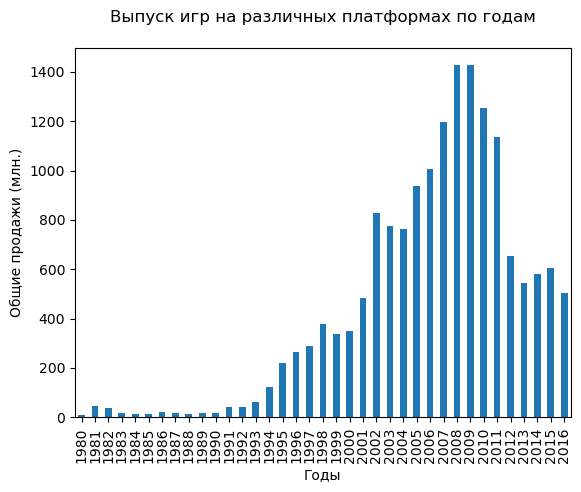

In [25]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', legend = False)
    .set(title='Выпуск игр на различных платформах по годам' + "\n", xlabel='Годы', ylabel='Общие продажи (млн.)')
);

Судя по диаграмме, до 1994 не выпускалось даже 100 игр в год. По сравнению с 2009 годом, в котором выпустили около 1500 игр, эти значения несущественные.

### 3.2. Посмотрим, как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [26]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Посмотрим, как изменялись по годам продажи 6-ти пратформ с наимбольшими продажами: PS2, X360, PS3, Wii, DS, PS.

In [27]:
top_6 = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

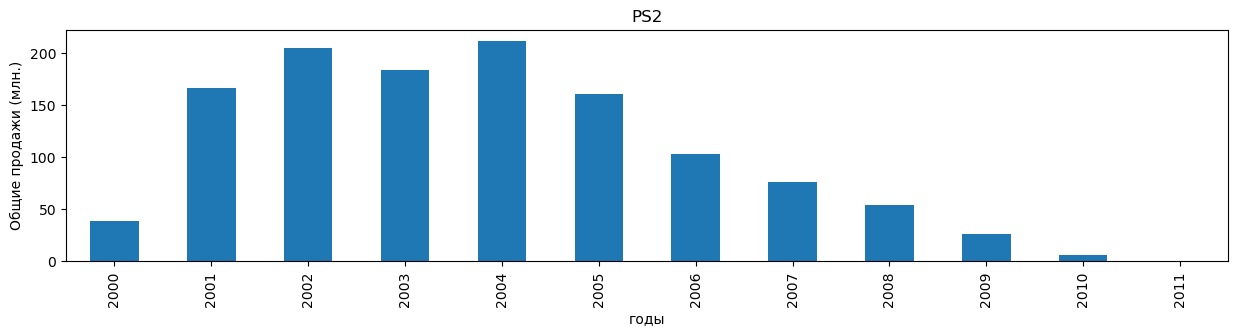

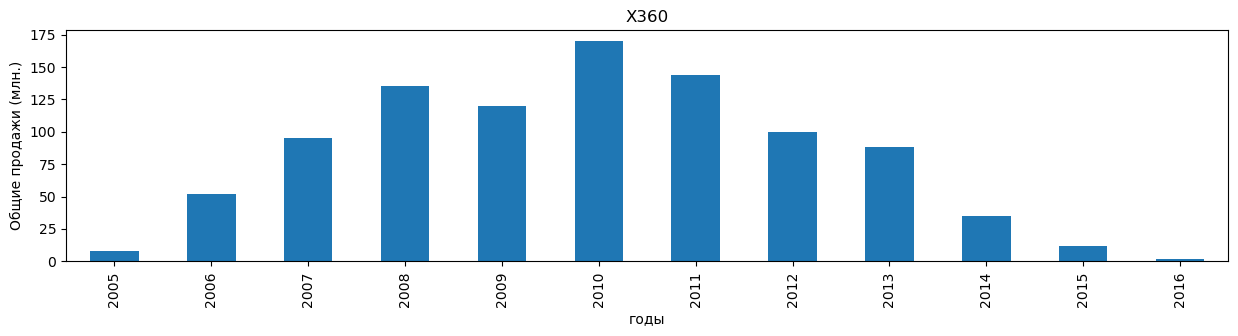

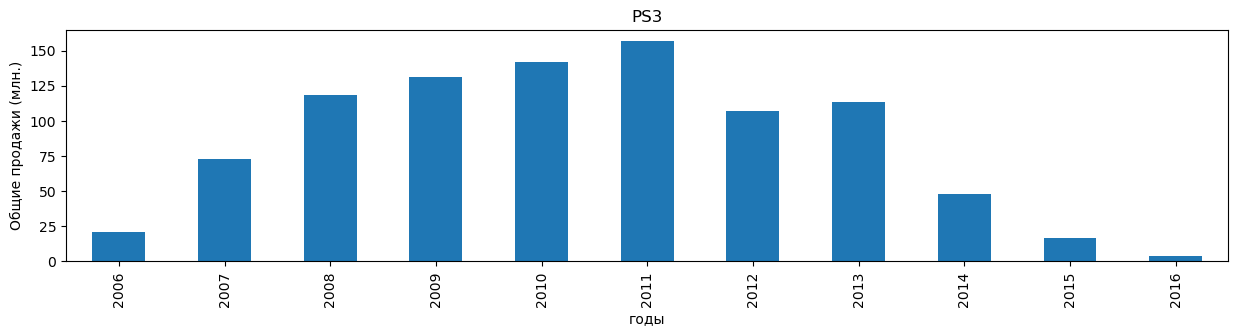

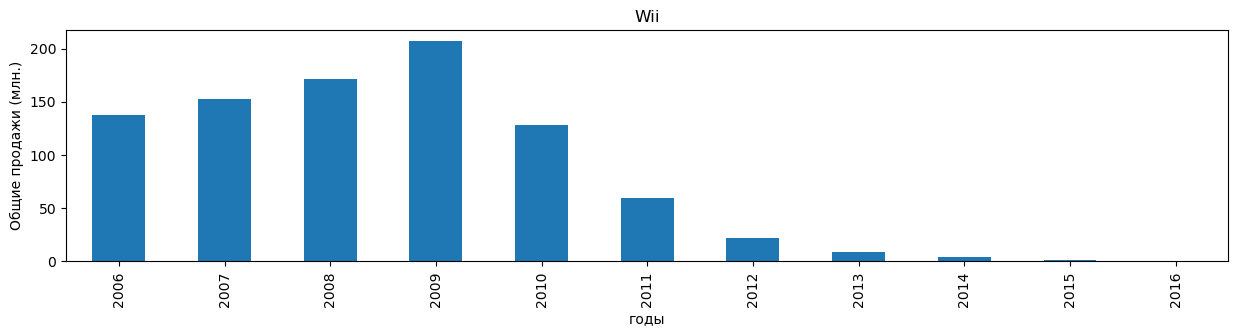

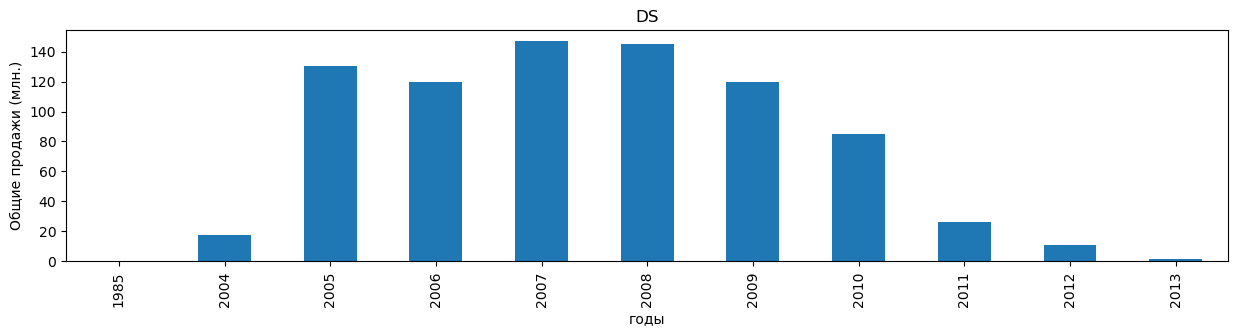

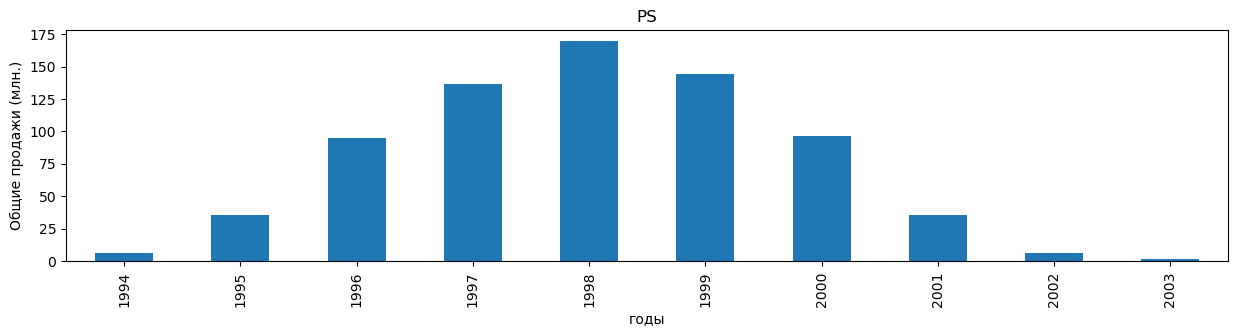

In [28]:
for platform in top_6:
    (
        data.query('platform == @platform')
        .pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')
        .plot(kind='bar', figsize = (15,3), legend=False)
        .set(title=platform, xlabel='годы', ylabel='Общие продажи (млн.)')
    );

Можем заметить, что платформы создавались и работали в разное время: большинство было создано и развивались в 2000-х годах, но платформа PS - в 1990-х. У всех платформ наблюдается плавный рост продаж в начале работы, активный рост в течение 5-7 лет, пик активности примерно на 5 год существования, и далее плавное снижение продаж, зачастую связанное с тем, что вышла более новая версия платформы: например, после PS выпустили PS2, и практически все пользователи перешли на более новую версию.

### 3.3. Определимся с актуальным периодом

Предлагаю за **актуальный период** взять последние 5 лет. Ранее мы уже замечали, что в среднем платформы находтся на стадии активного роста 5-7 лет, далее идет спад продаж. По этой причине оградим данные 2011 годом, так как таким образом мы оставим только те  платформы, которые недавно начали существовать и находятся на этаре роста, скором времени достивгув своего пика.

In [29]:
data = data.query('year_of_release > 2011')

### 3.4. Выберем несколько потенциально прибыльных платформ

In [30]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

Осталось не так много платформ, построим график их развития по годам, чтобы определить, на каком этапе жизненного цикла они находятся и выявить перспективные платформы.

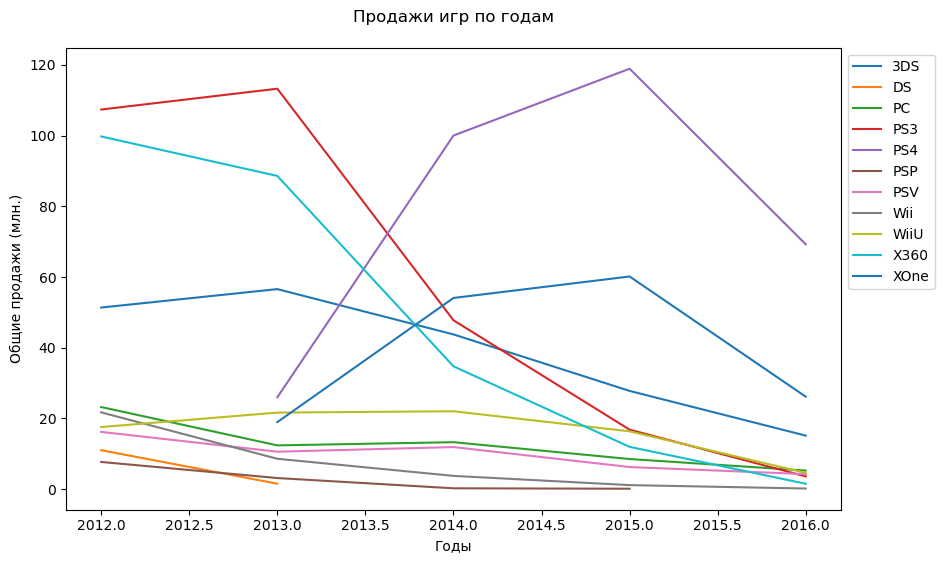

In [31]:
(
    data
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
    .plot(figsize=(10, 6))
    .set(title='Продажи игр по годам' + "\n", xlabel='Годы', ylabel='Общие продажи (млн.)')
);
plt.legend(bbox_to_anchor=(1,1));

Как и ожидалось, платформы PS3, X360 уже находятся на этапе спала продаж, это было заметно еще на предыдущих графиках. Платформы DS, PSP и вовсе перестали существовать уже к 2015 году. Наиболее прерспективными выглядят PS4 и XOne, так как они начали существовать всего 3 года назад и до 2015 года показывали активный рост, который может продолжиться и впоследствие.

### 3.5. «Ящики с усами» 

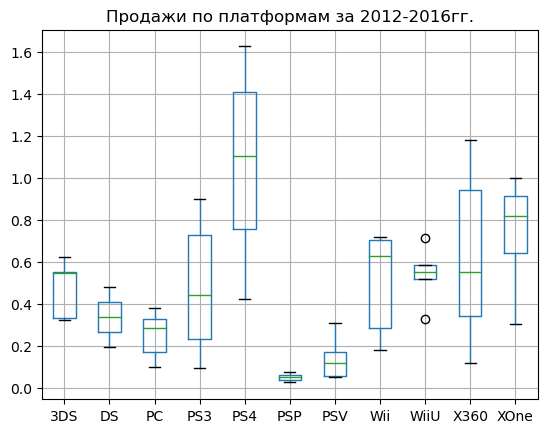

In [32]:
(
    data
    .pivot_table(index='year_of_release', columns='platform', values='sum_sales')
    .boxplot()
    .set_title('Продажи по платформам за 2012-2016гг.')
);

Выбросы наблюдаются только у платформы WiiU, что не может не радовать. У большинства платформ наблюдается нормальное распределение. 

### 3.6. Влияние оценки пользователей и критиков на продажи 

Проверим гипотезу о том, что игры с лучшими оценками пользоватеелй и критиков лучше продаются. Для того, чтобы это проверить, возьмем наиболее популярную платформу - как мы помним, это PS4 - и  построим диаграмму рассеяния между отзывами и продажами и посчитаем их корреляцию.

In [33]:
def correlation(name_platform):
    platform = data[data['platform'] == name_platform]
    fig, ax = plt.subplots(1, 2, figsize = (10,3))
    sns.scatterplot(data=platform, x='critic_score', y='sum_sales', ax=ax[0])
    sns.scatterplot(data=platform, x='user_score', y='sum_sales', ax=ax[1])
    fig.suptitle(name_platform, fontsize=10)
    ax[0].set(xlabel='Оценка критиков')
    ax[1].set(xlabel='Оценка пользователей')    
    ax[0].set(ylabel='Общие продажи (млн.)')    
    ax[1].set(ylabel='Общие продажи (млн.)')
    plt.show()
    
    print('Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи":', \
          round(platform['critic_score'].corr(platform['sum_sales']), 2))
    print('Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи":', \
          round(platform['user_score'].corr(platform['sum_sales']), 2))    

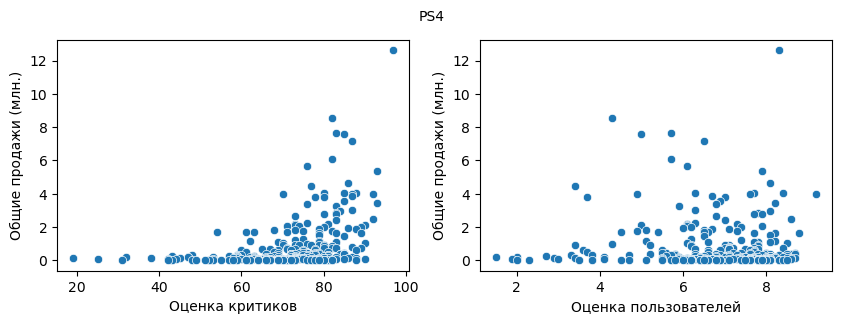

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.41
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.03


In [34]:
correlation('PS4')

Как мы можем видеть, графики обоих случаях схожи, и показывают нелинейную зависимость. Что касается коэффициента корреляции Пирсона, то зависимость продаж с отзывами критиков слабая, а с отзывами пользователей и вовсе практически отсутсвует. 

Посмотрим, схожа ли ситуация на других платформах.

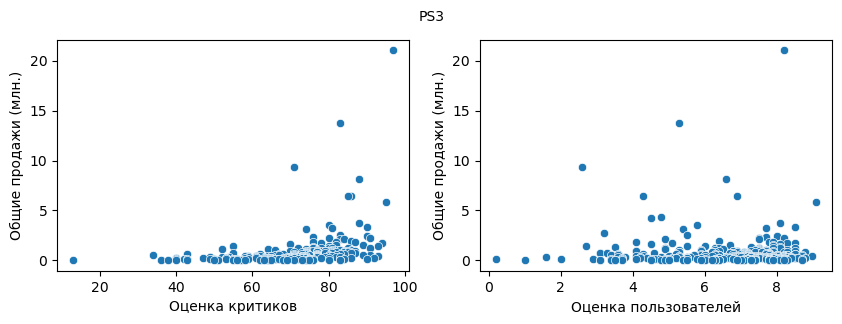

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.33
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.01


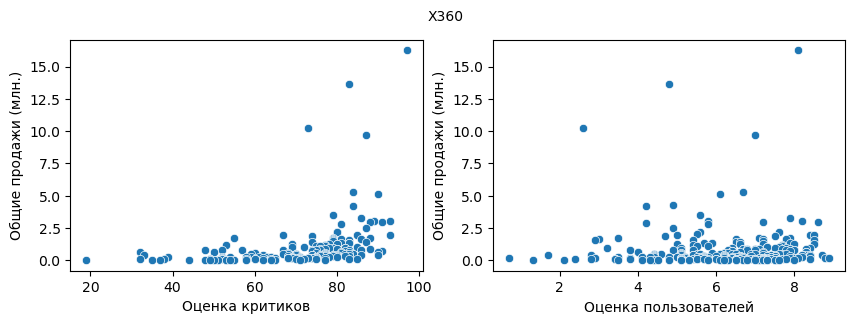

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.36
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": 0.01


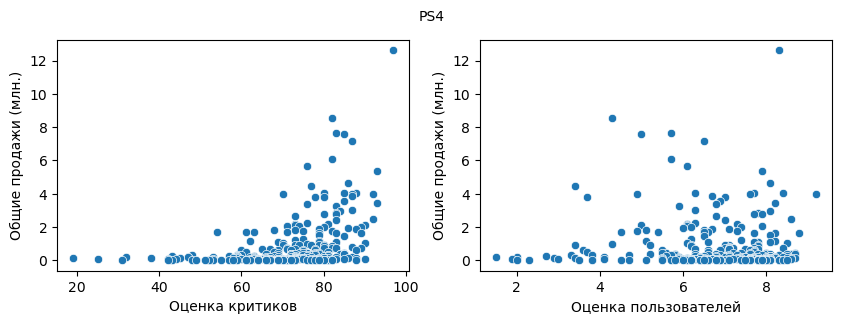

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.41
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.03


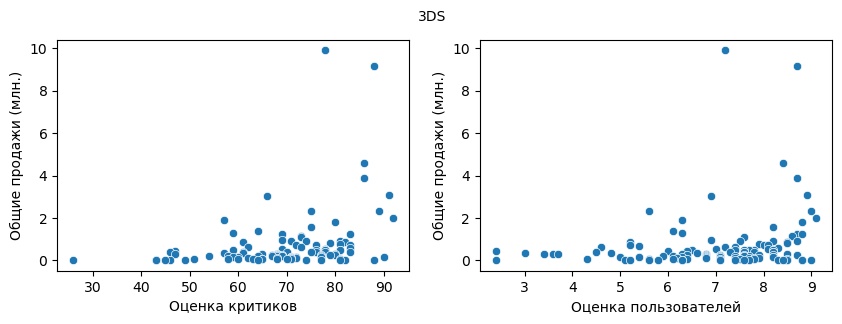

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.32
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": 0.2


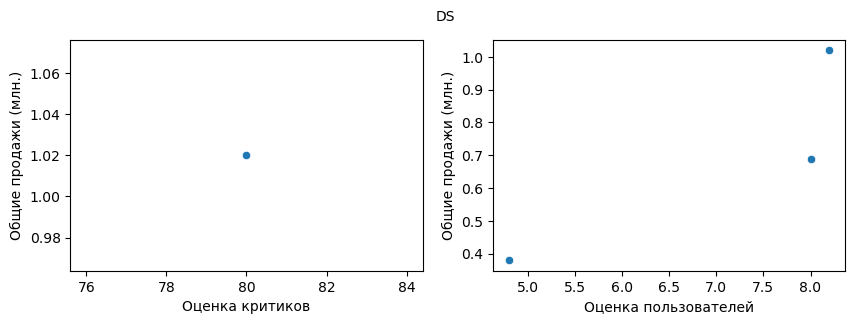

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": nan
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": 0.88


C:\Users\anast\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\anast\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


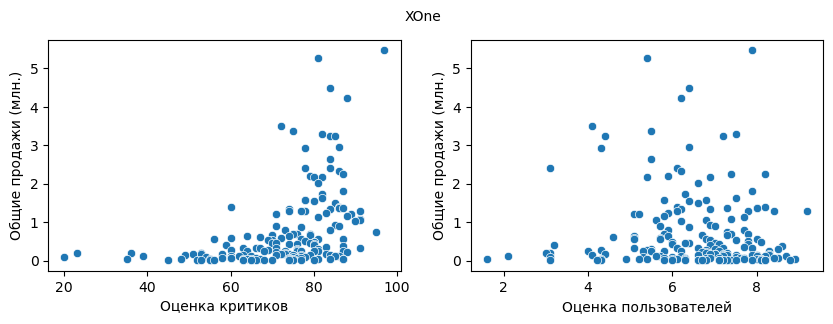

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.42
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.07


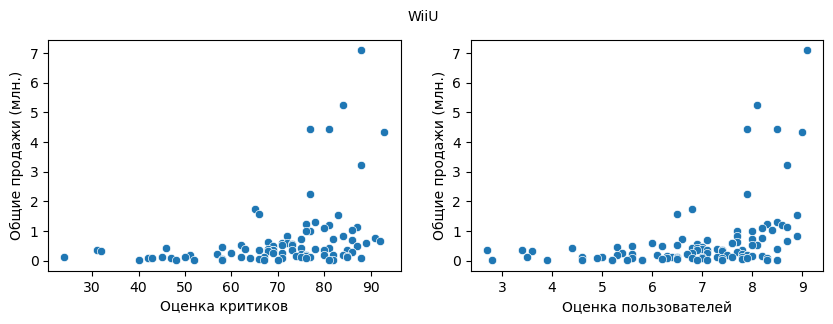

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.35
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": 0.4


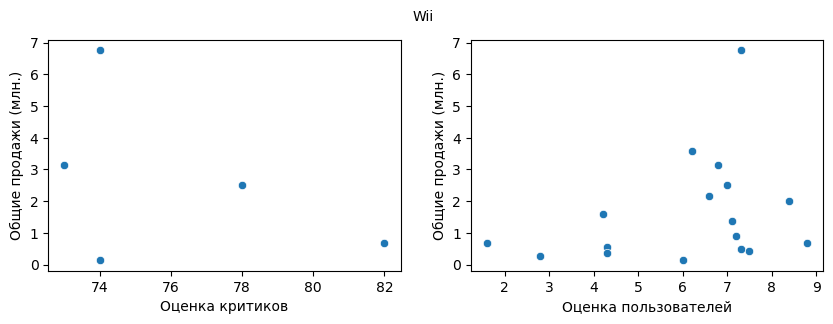

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": -0.42
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": 0.3


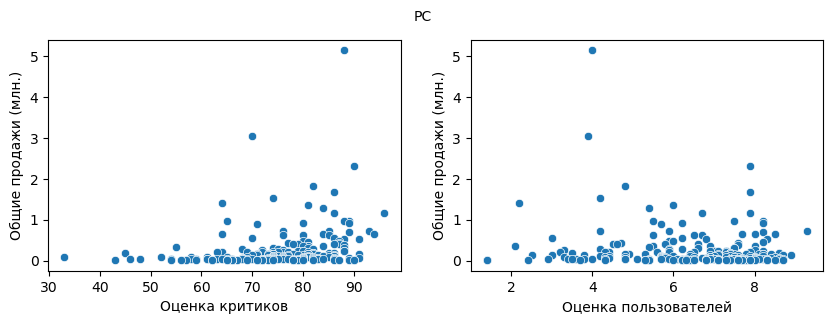

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.24
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.12


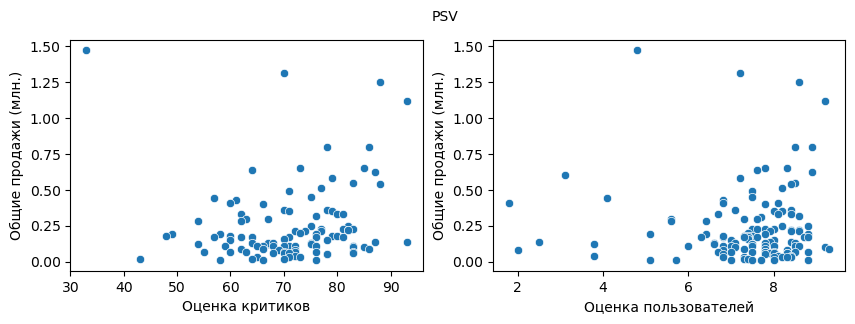

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": 0.09
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.0


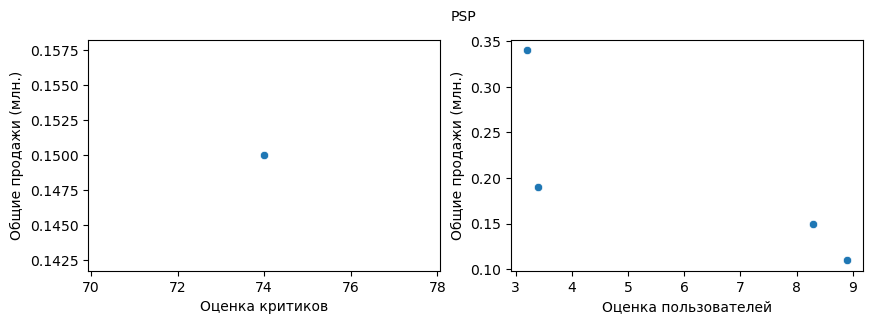

Коэффициент корреляции Пирсона "Оценка критиков-Общие продажи": nan
Коэффициент корреляции Пирсона "Оценка пользователей-Общие продажи": -0.8


C:\Users\anast\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\anast\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [35]:
for platform in data['platform'].unique():
    correlation(platform)

На других платформах наблюдается схожая ситуация. Засисимость между оценками критиков и пользователей и прождажами крайне низка, из чего мы можем сделать вывод, что наша гипотеза о том, что игры с лучшими оценками пользователей и критиков лучше продаются, не подтвердилась.

### 3.7. Посмотрим на общее распределение игр по жанрам

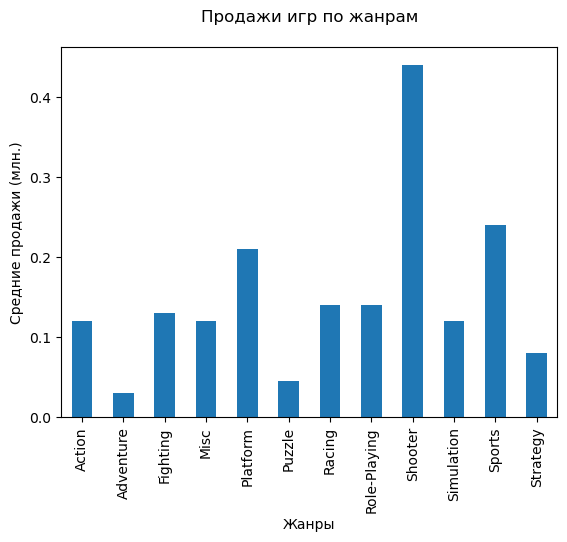

In [36]:
(
    data.pivot_table(index='genre', values='sum_sales', aggfunc='median')
    .plot(kind='bar', legend = False)
    .set(title='Продажи игр по жанрам' + "\n", xlabel='Жанры', ylabel='Средние продажи (млн.)')
);

Лучше всего продаются игры жанра Shooter, далее идут Sports и Platform. Наименее востребованные - Adventure и Puzzle.

**Выводы**

Получив данные аж с 1980 года, мы проанализировали работу платформ с самыми большими продажами и пришли к выводу, что в среднем платформа находится на пике своей активности 5-7 лет. Поэтому, чтобы дальше работать только с актуальными данными, на основе которых можно строить выводы, мы оставили только данные, позднее 2011 года.

На данный момент наиболее перспективными платформами являются PS4 и XOne, а наиболее продаваемые жанры - Shooter, Sports и Platform.

Также, хотелось бы отметить, что взаимосвязи между продажами и оценками критиков и пользователей не наблюдается: оценки могут быть высокие как у популярных и хорошо продающихся игр, так и у плохо продающихся.

## 4. Составим портрет пользователя каждого региона  <a id='portrait'></a>

### 4.1. Самые популярные платформы

Определим самые популярные платформы по регионам

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64


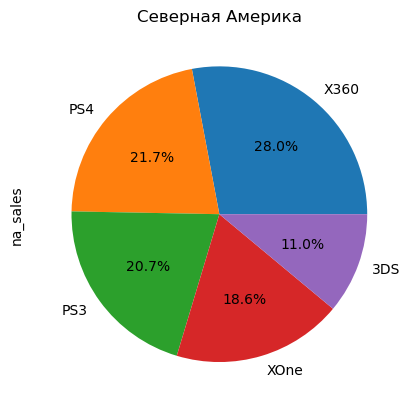

In [37]:
na_top_5 = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
print(na_top_5)
na_top_5.plot(kind='pie', autopct='%.1f%%').set_title('Северная Америка');

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64


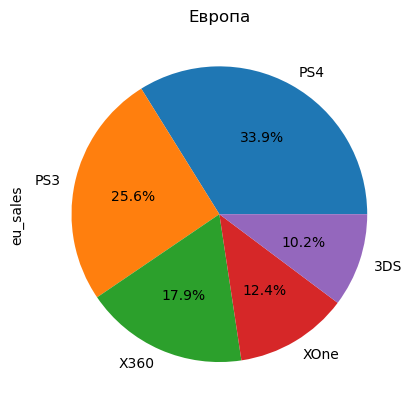

In [38]:
eu_top_5 = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
print(eu_top_5)
eu_top_5.plot(kind='pie', autopct='%.1f%%').set_title('Европа');

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


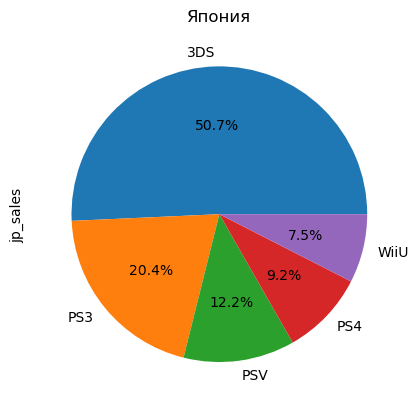

In [39]:
jp_top_5 = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
print(jp_top_5)
jp_top_5.plot(kind='pie', autopct='%.1f%%').set_title('Япония');

В Северной Америке самая большая доля (28%) принадлежат платформе X360, второе место занимает PS4 с 22%. В Европе наибольший процент (34%) у платформы PS4, X360 же только на 3 месте. В Японии и вовсе совершенно другая картина: наибольшая доля у 3DS, PS4 аж на 4 месте, а X360 вовсе не входит в топ-5.

### 4.2. Самые популярные жанры

In [40]:
data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [41]:
data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [42]:
data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

В Северной Америке и Европе довольно схожий топ, различается только последнее место: в Америке это другие жанры (Misc), в то время как в Европе это гонки. Остальные же полностью совпадают: экшен, шутеры, спорт и ролевые игры.

Совершенно другой топ-5 в Японии: на первом месте находятся ролевые игры, после них экшен, другие женры, симуляции и файтинг. Такое различие может быть связано с аниме-культурой, которая наиболее развита в Японии, как стране её происхождения. В Европе и Северной Америке же довольно схожие культуры.

### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
RP,91.50,108.84,103.31
T,52.96,26.02,66.02


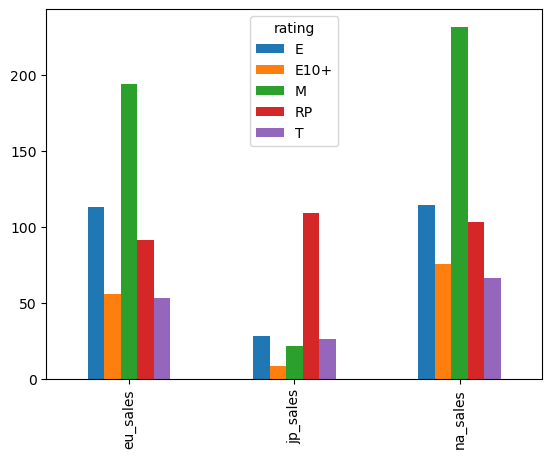

In [44]:
(
    data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .T.plot(kind='bar')
);

В Европе и Америке большинство игр подходят для лиц старше 17 лет, что вполне логично, ведь именно в этом возрасте люди активно играют в игры. Также, довольно популярны игры без возрастных ограничений (Е). Стабильный уровень по всем регионам у игр, с еще не присвоенной категорией.

Что касается Японии, то там в принципе продажи значительно ниже, чем в других двух регионах, и большинство приходится на игры, которым еще не присвоен окончательный рейтинг ESRB. Далее идут игры, подходящие для всех возрастных категорий. 

**Выводы**

У пользователей из Северной Америки и Европы довольно схожие вкусы, однако пользователи Японии сильно от них отличаются.

## 5. Проверка гипотез <a id='hypotheses'></a>

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза Ho: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза Ha: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Будем использовать t-тест для проверки раверства средних двух генеральных совокупностей.

Уровнень статистической значимости примем за 5%.

In [45]:
XOne = data.query('platform == "XOne"')['user_score'].dropna()
PC = data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05

result_1 = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение: ', result_1.pvalue)

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет основания отвергнуть нулевую гипотезу')

p-значение:  0.5489537965134912
Нет основания отвергнуть нулевую гипотезу


В данном случае нет основания отвергнуть нулевую гипотезу, значит мы можем полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза Ho: средние пользовательские рейтинги платформ жанров Action и Sports равны.

Альтернативная гипотеза Ha: средние пользовательские рейтинги жанров Action и Sports не равны.

Будем использовать t-тест для проверки раверства средних двух генеральных совокупностей.

Уровнень статистической значимости примем за 5%.

In [46]:
action = data.query('genre == "Action"')['user_score'].dropna()
sports = data.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.05

result_1 = st.ttest_ind(action, sports, equal_var=False)

print('p-значение: ', result_1.pvalue)

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет основания отвергнуть нулевую гипотезу')

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


При тестировании гипотезы p-value оказался значительно меньше уровня статистической значимости, из-за чего мы вынуждены отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports, действительно, разные.

**Выводы**

Выдвинув две гипотезы и проверив их с помощью статистического теста, мы пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports, наоборот, разные.

## 6. Общий вывод  <a id='results'></a>

В ходе работы мы обработали данные - изменили названия столбцов, согласно хорошему стилю, исправили типы данных в тех столбцах, в которых это требовалось, убрали пропуски в данных, где это было возможно, а также добавили новый столбец с суммарными продажами, который впоследствии нам пригодился.

Далее убрали часть данных, оставив только актуальные: в среднем платформа находится на пике своей активности 5-7 лет, поэтому мы оставили только данные, позднее 2011 года.

В ходе исследования выяснилось, что на данный момент наиболее перспективными платформами являются PS4 и XOne, а самый продаваемый жанр - Shooter. Также, хотелось бы отметить, оценки критиков и пользователей не влияют на продаваемость игр.

Еще одино вполне ожидаемой заключение к которому мы пришли: портреты пользователей Северной Америки и Европы довольно схожи, но очень сильно отличаются от портрета пользователей Японии, что может объясняться культурой.

И напоследок, выдвинув и протестировав 2 гипотезы, мы узнали, что у платформ Xbox One и PC равные средние пользовательские рейтинги, а у жанров Action и Sports, наоборот, разные.